In [ ]:
# 구글드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

# 작업 디렉토리 설정
import os
os.chdir('/content/drive/MyDrive/PyStat')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 객체 내용/타입 출력
def printobj(*a):
    for x in a:
        display(x)
        print('\n', type(x), '\n')

# 추론 통계

<details><summary>추론 통계(inferential statistics) : 수집한 데이터를 바탕으로 추론, 예측하는 통계 기법
</summary>

- 모집단/표본
- 확률변수
- 확률분포
- 표본분포
- 추정/검정

## CHAP 5. 이산형 확률변수

- 5장부터 9장

- 파이썬 통계분석

- 라이브러리 사용법?

- 바탕이 되는 수학

- 구체적인 예로 파이썬 구현

- NumPy / Matplotlib

- 확률변수의 종류

- 5\~6장 이산 / 7\~8장 연속

- 5/7장

- 6/8장

- 임포트

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 소수점 이하 3자리까지 출력
%precision 3
np.set_printoptions(precision=3, suppress=True)

# 그래프가 Jupyter Notebook 위에 표시되도록 설정
%matplotlib inline

### 5-1. 1차원 이산형 확률변수

- 이산형 확률변수 = 정수

- 1차원 이산형
  - 불공정한 주사위

#### 1) 1차원 이산형 확률변수의 정의

##### <u>확률질량함수</u>

- 확률변수
  - 취할 수 있는 값
  - 그 값이 나올 확률

- 값의 집합 $\{x_1, x_2, ⋯ \}$

- 값의 확률

$$
P(X=x_k) = p_k \quad (k=1,2,⋯)
\tag{5-1}
$$

- 확률은 $x$의 함수

$$
f(x)=P(X=x_k) = p_k
\tag{5-2}
$$

- **확률질량함수**(probability mass function, PMF) / **확률함수**

- **확률분포**(probability distribution)


- 확률분포 결정
  - 확률변수의 움직임 결정

- 확률분포 결정
  - 확률변수의 발현 비율 결정


- 불공정한 주사위 예

- 취할 수 있는 값의 집합
  - x_set으로 정의

- 집합 $\ne$ 배열.
  - 편의상 NumPy ndarray

In [ ]:
x_set = np.array([1, 2, 3, 4, 5, 6])

- x_set에 대응하는 확률

- 불공정한 주사위의 확률분포

[표 5-1] 불공정한 주사위의 확률분포

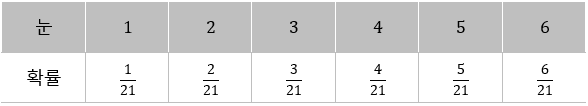

- $p_k$를 하나씩?

$$
\begin{align}
p_1 &= P(X=1) = \frac{1}{21} \\\\
p_2 &= P(X=2) = \frac{2}{21} \\
\end{align}
\tag{5-3}
$$
$$ \vdots $$

- 확률함수 사용
  - 6장

- 불공정한 주사위의 확률함수

$$
f(x) =
\begin{cases}
\cfrac{x}{21} & (x \in \{1,2,3,4,5,6\}) \\\\
0 & (otherwise)
\end{cases}
\tag{5-4}
$$

- 확률 반환 함수

- 파이썬 구현

In [ ]:
def f(x):
    if x in x_set:
        return x / 21
    else:
        return 0

- 확률분포는 세트
  - 값의 집합
  - 확률함수

- 확률분포 $A$
  - [ x_set,&nbsp;&nbsp;f ] 리스트로 정의

In [ ]:
A = [x_set, f]

- 확률분포 $A$로 확률변수 $X$ 움직임 결정
  - ($X∼A$)

In [ ]:
X = A

- 확률분포표 확인

- 값의 집합 / 확률함수

In [ ]:
xA_set, fA = X

- $x_k$와 $p_k$의 딕셔너리

In [ ]:
# 확률 p_k를 구한다
prob = np.array([fA(x_k) for x_k in xA_set])

# x_k와 p_k의 대응을 딕셔너리로 표시
dict(zip(xA_set, prob))

{1: 0.047619047619047616,
 2: 0.09523809523809523,
 3: 0.14285714285714285,
 4: 0.19047619047619047,
 5: 0.23809523809523808,
 6: 0.2857142857142857}

- 시각화

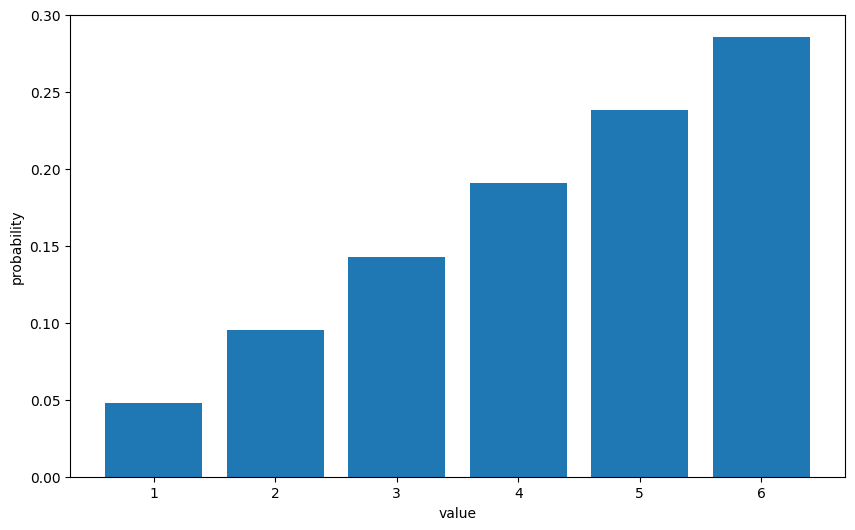

[그림 5-1] 불공정한 주사위의 확률분포


In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.bar(xA_set, prob)
ax.set_xlabel('value')
ax.set_ylabel('probability')

plt.show()
print('[그림 5-1] 불공정한 주사위의 확률분포')

##### <u>확률의 성질</u>

- 0 / 1

- 두 식을 만족

$$
\begin{align}
f(x) & ≥ 0 \\\\
\sum_k{f(x_k)} & = 1 \\
\end{align}
\tag{5-5}
$$

- np.all()

In [ ]:
np.all(prob >= 0)

True

 - 확률의 총합

In [ ]:
np.sum(prob)

0.9999999999999999

##### <u>누적분포함수</u>

- 확률변수 $X$가 $x$가 될 때

- 확률변수 $X$가 $x$ 이하가 될 때까지

- **누적분포함수**(cumulative distribution function, CDF) / **분포함수**

$$
F(x) = P(X≤x_k) = \sum_{x_k≤x}{f(x_k)}
\tag{5-6}
$$

- 파이썬 구현

In [ ]:
def F(x):
    return np.sum([f(x_k) for x_k in x_set if x_k <= x])

- 눈이 3이하

In [ ]:
F(3)

0.2857142857142857

##### <u>확률변수의 변환</u>

확률변수의 변환
- $2X+3$
- 표준화

- $2X+3$ &nbsp; 확률변수? &nbsp;&nbsp; 확률분포는?

- 주사위의 눈 $=X$
  - 눈에 2를 곱하고 3을 더한 숫자 $=2X+3$

- $2X+3$
  - 취할 수 있는 값 : $\{5, 7, 9, 11, 13, 15 \}$
  - 값이 나올 확률 : 이전과 동일

- $2X+3→$ 확률변수

- $Y=2X+3$의 확률분포 $\tilde{A}$

- 확률분포 $\tilde{A}$
  - 취할 수 있는 값
  - 확률함수 세트의 리스트

In [ ]:
# 확률변수 Y가 취할 수 있는 값의 집합
y_set = np.array([2 * x_k + 3 for x_k in x_set])

# y_set에 대응하는 x_set으로 역변환하여
# 확률변수 Y의 확률을 계산하는 확률함수
fy = lambda y: f((y-3)/2)

# 확률분포 Ã를 리스트로 정의
Ã = [y_set, fy]

- $Y∼\tilde{A}$

In [ ]:
Y = Ã

- 확률분포표

- 값의 집합 / 확률함수

In [ ]:
yÃ_set, fÃ = Y

- $y_k$와 $p_k$의 딕셔너리

In [ ]:
# 확률 p_k를 구한다
prob = np.array([fÃ(y_k) for y_k in yÃ_set])

# y_k와 p_k의 대응을 딕셔너리로 표시
dict(zip(yÃ_set, prob))

{5: 0.047619047619047616,
 7: 0.09523809523809523,
 9: 0.14285714285714285,
 11: 0.19047619047619047,
 13: 0.23809523809523808,
 15: 0.2857142857142857}

- 시각화

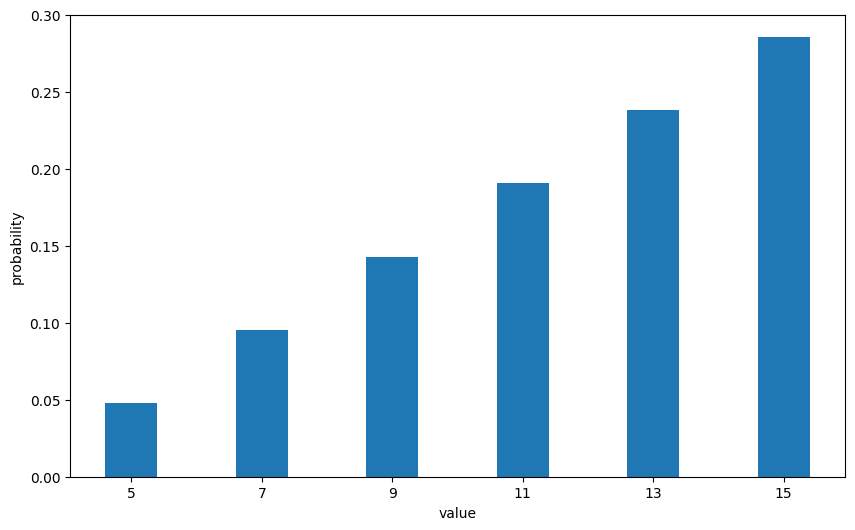

[그림 5-2] 불공정한 주사위 눈에 2를 곱하고 3을 더한 값의 확률분포


In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.bar(yÃ_set, prob)
ax.set_xlabel('value')
ax.set_ylabel('probability')
# 가로축 [5, 7, 9, 11, 13, 15] 위치에 눈금을 표시
ax.set_xticks(np.linspace(5, 15, 6))

plt.show()
print('[그림 5-2] 불공정한 주사위 눈에 2를 곱하고 3을 더한 값의 확률분포')

#### 2) 1차원 이산형 확률변수의 지표

- 1차원 데이터

- 1차원 확률변수

##### <u>기대값</u>

- 평균

- 데이터의 평균

- 확률변수의 평균?

- 무수히 많이 시행

- 이산형 확률변수의 평균

$$
E(X) = \sum_k{x_k f(x_k)}
\tag{5-7}
$$

- 무한 번 시행 결과와 일치?

- **기대값**(expected value)
  - $μ$ / $E(X)$

- 식(5-7) 정의대로 계산

In [ ]:
np.sum([x_k * f(x_k) for x_k in x_set])

4.333333333333333

- 100만 번 시행으로 계산

In [ ]:
sample = np.random.choice(x_set, int(1e6), p=prob)
np.mean(sample)

4.333452

- 시행 횟수 커지면 수렴

- 확률변수의 분산, 공분산도 마찬가지

- 변환된 확률변수의 기대값

- $2X+3$으로 변환한 $Y$의 기대값

- 식(5-7) &nbsp;&nbsp; $x_k → (2x_k+3)$

$$
E(Y) = E(2X+3) = \sum_k{(2 x_k + 3) f(x_k)}
\tag{5-8}
$$

- 일반화된 변환 $g(X)$의 기대값

> **이산형 확률변수의 기대값**

> $$
E(g(X)) = \sum_k{g(x_k) f(x_k)}
\tag{5-9}
$$

- 기대값 함수 구현
  - 인자 $g$는 변환 함수

In [ ]:
def E(X, g=(lambda x: x)):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

- $X$의 기대값 (인자 g 無)

In [ ]:
E(X)

4.333333333333333

- $Y=2X+3$의 기대값

In [ ]:
E(X, g=(lambda x: 2*x + 3))

11.666666666666664

- 기대값의 선형성

> **기대값의 선형성**

> $a$, $b$가 실수, $X$가 확률변수일 때<br><br>
>
> $$
E(a X + b) = a E(X) + b
\tag{5-10}
$$<br>
>
> 가 성립한다.

- $E(2X+3)\overset{?}{=}2E(X)+3$

In [ ]:
2 * E(X) + 3

11.666666666666666

- 확실히 성립

##### <u>분산</u>

- 산포도의 지표

- 편차 제곱의 기대값

$$
V(X) = \sum_k{(x_k - μ)^2 f(x_k)}
\tag{5-11}
$$

- $σ^2$ / $V(X)$

- 불공정한 주사위의 분산

In [ ]:
mean = E(X)
np.sum([(x_k - mean)**2 * f(x_k) for x_k in x_set])

2.2222222222222223

- 변환된 확률변수의 분산

- $2X+3$으로 변환한 $Y$의 분산

$$
V(2X+3) = \sum_k{((2 x_k + 3) - μ)^2 f(x_k)}
\tag{5-12}
$$

- 일반화된 변환 $g(X)$의 분산

> **이산형 확률변수의 분산**

> $$
V(g(X)) = \sum_k{(g(x_k) - E(g(X)))^2 f(x_k)}
\tag{5-13}
$$

- 분산 함수 구현
  - 인자 $g$는 변환 함수

In [ ]:
def V(X, g=(lambda x: x)):
    x_set, f = X
    return np.sum([(g(x_k) - E(X, g))**2 * f(x_k) for x_k in x_set])

- $X$의 분산 (인자 g 無)

In [ ]:
V(X)

2.2222222222222223

- $Y=2X+3$의 분산

In [ ]:
V(X, g=(lambda x: 2*x + 3))

8.88888888888889

- 분산의 공식

> **분산의 공식**

> $a$, $b$가 실수, $X$가 확률변수일 때<br><br>
>
> $$
V(a X + b) = a^2 V(X)
\tag{5-14}
$$<br>
>
> 가 성립한다.

- $V(2X+3)\overset{?}{=}2^2V(X)$

In [ ]:
2**2 * V(X)

8.88888888888889

### 5-2. 2차원 이산형 확률변수

- 2차원 이산형 확률변수

- 2개의 불공정한 주사위

#### 1) 2차원 이산형 확률변수의 정의

##### <u>결합확률분포</u>

- 1차원 확률변수 2개 $→(X,Y)$.

- 확률변수의 움직임
  - 값의 조합의 집합
  - 확률에 의해 결정

- 값의 조합의 집합

$$
\{ (x_i, y_j) \; | \; i=i, 2, ⋯ ; \; j = 1, 2, ⋯ \}
\tag{5-15}
$$

- $X$가 $x_i$,$Y$가 $y_j$인 확률

$$
P(X=x_i, Y=y_j) = p_{ij} \quad (i = 1, 2, ⋯ \; ; \; j = 1, 2, ⋯)
\tag{5-16}
$$

- **결합확률분포**(joint probability distribution) / **결합분포**

- 불공정한 주사위 2개
  - $X←$&nbsp;주사위A,&nbsp;&nbsp;$Y←$&nbsp;주사위B
  - 공분산 $=0$

- 2차원 확률변수 $(X,Y)$
  - $X←$&nbsp;주사위A $+$ 주사위B
  - $Y←$&nbsp;주사위A

- 값의 집합
  - $X$ : $\{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12\}$
  - $Y$ :  $\{1, 2, 3, 4, 5, 6\}$이다.

- $X=9$, $Y=4$일 때의 확률

- A눈 4, B눈 5의 결합확률
  - $\cfrac{4}{21}×\cfrac{5}{21}=\cfrac{20}{441}$

- 모든 $(X,Y)$ 조합에 대해 확률 계산

[표 5-2] 불공정한 주사위의 결합확률분포

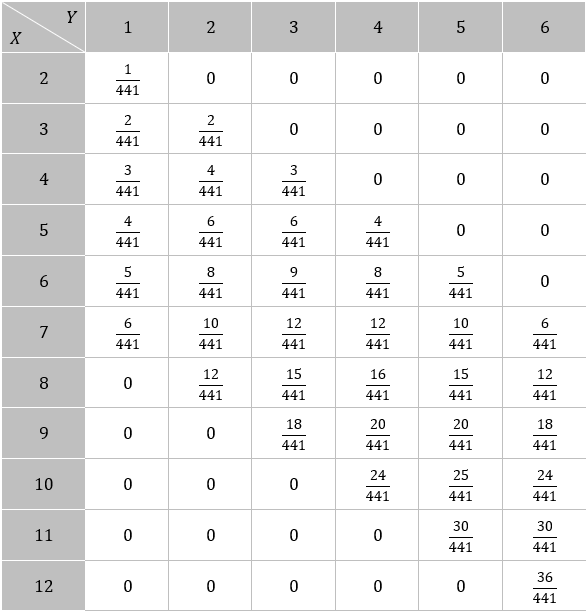

- 확률은 $x$, $y$의 함수
  - $P(X=x, Y=y) = f_{XY}(x, y)$
  - **결합확률함수**(joint probability function)

$$
f_{XY}(x, y) =
\begin{cases}
\cfrac{y(x-y)}{441} & (y \in \{1,2,3,4,5,6\}, \, x-y \in \{1,2,3,4,5,6\}) \\\\
0 & (otherwise)
\end{cases}
\tag{5-17}
$$

##### <u>확률의 성질</u>

- 0 / 1

- 두 식을 만족

$$
\begin{align}
f_{XY}(x_i, y_j) & ≥ 0 \\\\
\sum_i{\sum_j{f_{XY}(x_i, y_j)}} & = 1 \\
\end{align}
\tag{5-18}
$$

- 파이썬 구현

- 취할 수 있는 값의 집합
  - x_set, y_set으로 정의

In [ ]:
x_set = np.arange(2, 13)
y_set = np.arange(1, 7)

- 식(5-17) 그대로 구현

In [ ]:
def f_XY(x, y):
    if 1 <= y <= 6 and 1 <= x - y <= 6:
        return y * (x - y) / 441
    else:
        return 0

- 확률분포 $\underline{A}$
  - 취할 수 있는 값의 집합 x_set, y_set
  - 결합확률함수 f_XY 세트의 리스트

In [ ]:
A̱ = [x_set, y_set, f_XY]

- $(X,Y)∼\underline{A}$

In [ ]:
XY = A̱

- $(X,Y)$의 확률분포 시각화
  - 먼저, 값의 집합 / 확률함수

In [ ]:
xA̱_set, yA̱_set, fA̱_XY = XY

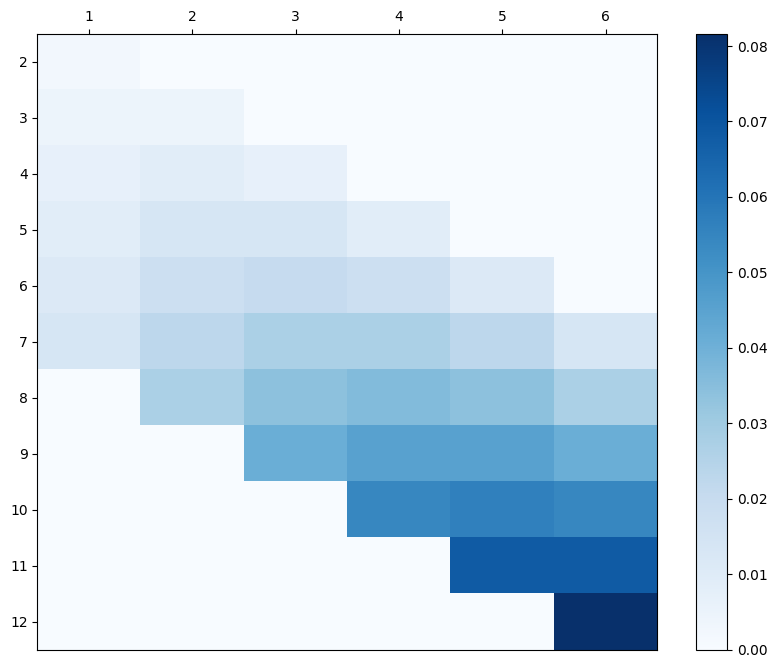

[그림 5-3] 2변량 확률분포의 히트맵


In [ ]:
prob = np.array([[fA̱_XY(x_i, y_j) for y_j in yA̱_set]
                                  for x_i in xA̱_set])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.pcolor(prob, cmap='Blues')
ax.set_xticks(np.arange(prob.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(prob.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(np.arange(1, 7), minor=False)
ax.set_yticklabels(np.arange(2, 13), minor=False)
# y축을 내림차순의 숫자가 되게 하여, 위 아래를 역전시킨다
ax.invert_yaxis()
# x축의 눈금을 그래프 위쪽에 표시
ax.xaxis.tick_top()
fig.colorbar(c, ax=ax)

plt.show()
print('[그림 5-3] 2변량 확률분포의 히트맵')

- $f_{XY}(x_i, y_j) ≥ 0$

In [ ]:
np.all(prob >= 0)

True

- $\sum_i{\sum_j{f_{XY}(x_i, y_j)}} = 1$

In [ ]:
np.sum(prob)

1.0

##### <u>주변확률분포</u>

- $(X,Y)→X$

- $f_X(x)$는
  - $Y$ 값 모두에 대해 더하여

$$
f_X(x) = \sum_{k}{f_{XY}(x, y_k)}
\tag{5-19}
$$

- $Y$의 영향 제거
  - $X$만 남는다

- **주변확률함수**(marginal probability function)

- $X$의 주변확률함수

In [ ]:
def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])

- $Y$의 주변확률함수

In [ ]:
def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])

- 개별적인 확률변수 취급

In [ ]:
X = [x_set, f_X]
Y = [y_set, f_Y]

- 시각화

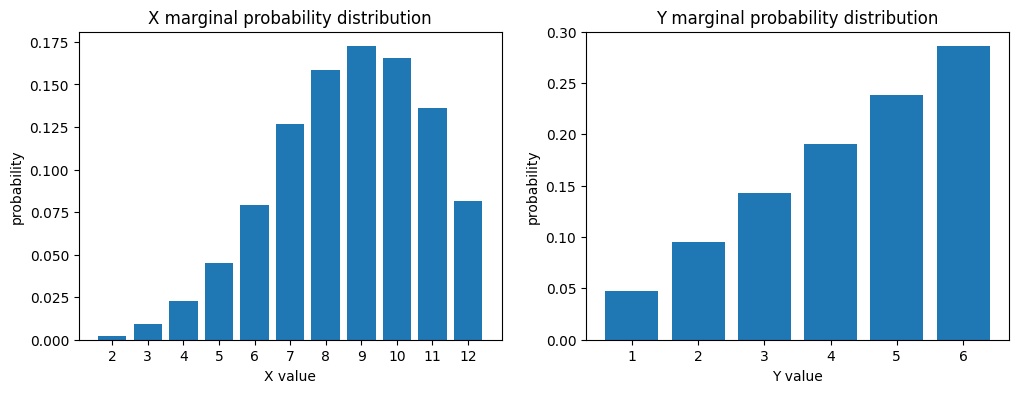

[그림 5-4] 주변확률분포


In [ ]:
prob_x = np.array([f_X(x_k) for x_k in x_set])
prob_y = np.array([f_Y(y_k) for y_k in y_set])

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(x_set, prob_x)
ax1.set_title('X marginal probability distribution')
ax1.set_xlabel('X value')
ax1.set_ylabel('probability')
ax1.set_xticks(x_set)

ax2.bar(y_set, prob_y)
ax2.set_title('Y marginal probability distribution')
ax2.set_xlabel('Y value')
ax2.set_ylabel('probability')

plt.show()
print('[그림 5-4] 주변확률분포')

- $f_{X}(x_k) ≥ 0, \quad f_{Y}(y_k) ≥ 0$

In [ ]:
np.all(prob_x >= 0), np.all(prob_y >= 0)

(True, True)

- $\sum_k{f_X(x_k)} = 1, \quad \sum_k{f_Y(y_k)} = 1$

In [ ]:
np.sum(prob_x), np.sum(prob_y)

(0.9999999999999999, 0.9999999999999999)

#### 2) 2차원 이산형 확률변수의 지표

- 기대값 / 분산

- 공분산 / 상관계수

##### <u>기대값</u>

- $X$의 기대값

$$
μ_X = E(X) = \sum_i{\sum_{j}{x_i f_{XY}(x_i, y_j)}}
\tag{5-20}
$$

- 파이썬 구현

In [ ]:
np.sum([x_i * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

8.666666666666666

- 일반화된 변환 $g(X,Y)$의 기대값

$$
E(g(X,Y)) = \sum_i{\sum_{j}{g(x_i, y_i) f_{XY}(x_i, y_j)}}
\tag{5-21}
$$

- 기대값 함수 구현
  - 인자 $g$는 변환 함수

In [ ]:
def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i, y_j) * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])

- $X$와 $Y$의 기대값

In [ ]:
mean_X = E(XY, lambda x, y: x)
mean_Y = E(XY, lambda x, y: y)
mean_X, mean_Y

(8.666666666666666, 4.333333333333333)

- 기대값의 선형성

> **기대값의 선형성**

> $a$, $b$가 실수, $X$, $Y$가 확률변수일 때<br><br>
>
> $$
E(a X + bY) = a E(X) + b E(Y)
\tag{5-22}
$$<br>
>
> 가 성립한다.

- $a=2$, $b=3$
  - $E(2X+3Y)\overset{?}{=}2E(X)+3E(Y)$

In [ ]:
a, b = 2, 3

In [ ]:
E(XY, lambda x, y: a*x + b*y)

30.333333333333332

In [ ]:
a*mean_X + b*mean_Y

30.333333333333332

##### <u>분산</u>

- $X$의 분산

$$
σ_X^2 = V(X) = \sum_i{\sum_{j}{(x_i - μ_X)^2 f_{XY}(x_i, y_j)}}
\tag{5-23}
$$

- 파이썬 구현

In [ ]:
np.sum([(x_i - mean_X)**2 * f_XY(x_i, y_j)
        for x_i in x_set for y_j in y_set])

4.444444444444444

- 일반화된 변환 $g(X,Y)$의 분산

$$
V(g(X,Y)) = \sum_i{\sum_{j}{(g(x_i, y_j) - E(g(X,Y)))^2 f_{XY}(x_i, y_j)}}
\tag{5-24}
$$

- 분산 함수 구현
  - 인자 $g$는 변환 함수

In [ ]:
def V(XY, g):
    x_set, y_set, f_XY = XY
    mean = E(XY, g)
    return np.sum([(g(x_i, y_j) - mean)**2 * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])

- $X$와 $Y$의 분산

In [ ]:
var_X = V(XY, lambda x, y: x)
var_Y = V(XY, lambda x, y: y)
var_X, var_Y

(4.444444444444444, 2.2222222222222223)

##### <u>공분산</u>

- 공분산

$$
σ_{XY} = Cov(X,Y) = \sum_i{\sum_{j}{(x_i - μ_X)(y_j - μ_Y) f_{XY}(x_i, y_j)}}
\tag{5-25}
$$

- 공분산 함수 구현

In [ ]:
def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    return np.sum([(x_i - mean_X) * (y_j - mean_Y) * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])

- 계산

In [ ]:
cov_XY = Cov(XY)
cov_XY

2.222222222222222

- 공식

> **분산과 공분산의 공식**

> $a$, $b$가 실수, $X$, $Y$가 확률변수일 때<br><br>
>
> $$
V(aX + bY) = a^2 V(X) + b^b V(Y) + 2\,a\,b\,Cov(X,Y)
\tag{5-26}
$$<br>
>
> 가 성립한다.

- 확인
<br><br>
$$
V(2X+3Y)=4V(X)+9V(Y)+12Cov(X,Y)
$$

In [ ]:
V(XY, lambda x, y: a*x + b*y)

64.44444444444444

In [ ]:
a**2 * var_X + b**2 * var_Y + 2*a*b * cov_XY

64.44444444444443

##### <u>상관계수</u>

- 상관계수 $ρ$

$$
ρ_{XY} = ρ(X,Y) = \frac{σ_{XY}}{σ_X σ_Y}
\tag{5-27}
$$

In [ ]:
cov_XY / np.sqrt(var_X * var_Y)

0.7071067811865474